In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark
spark = SparkSession.builder \
    .appName("TwitterSentimentAnalysis") \
    .getOrCreate()

# Define file names
file_names = ["03_May_84_recession.csv",
              "04_May_128_recession.csv",
              "05_May_150_recession.csv",
              "06_May_141_recession.csv",
              "07_May_172_recession.csv",
              "08_May_24_reccession.csv",
              "09_May_19_reccession.csv",
              "10_May_40_reccession.csv",
              "11_May_09_reccession.csv",
              "12_May_33_reccession.csv",
              "13_May_34_reccession.csv",
              "26_Apr_333_reccession.csv"
              ]

# Combine data
df = None
for file_name in file_names:
    df_temp = spark.read.csv(f"/content/drive/MyDrive/data-pdb/{file_name}", inferSchema=True, header=True)
    if df is None:
        df = df_temp
    else:
        df = df.union(df_temp)

## Data Understanding

### Collecting Data

In [ ]:
# Get top 5
df.show(5)

+--------------------+--------------------+
|                Date|               Tweet|
+--------------------+--------------------+
|2023-05-03 06:25:...|@PRSundar64 US is...|
|2023-05-03 06:25:...|"@saxena_puru But...|
|2023-05-03 06:25:...|@_swimfish @stats...|
|India🇮🇳 has rep...|                null|
|2023-05-03 06:24:...|@TaxpayersParty @...|
+--------------------+--------------------+
only showing top 5 rows



### Describe Data

In [ ]:
# check deskripsi dataset
df.describe().show()

+-------+--------------------+--------------------+
|summary|                Date|               Tweet|
+-------+--------------------+--------------------+
|  count|                2095|                1261|
|   mean|                null|                null|
| stddev|                null|                null|
|    min|    God will help...| #banking tension...|
|    max|🧊 US job market ...|🤡 First 'transit...|
+-------+--------------------+--------------------+



In [ ]:
df.columns

['Date', 'Tweet']

In [ ]:
# Counting Row and Columns Exist in DF

print(f"Terdapat sebanyak {df.count()} baris dan sebanyak {len(df.columns)} kolom pada dataset.")

Terdapat sebanyak 2095 baris dan sebanyak 2 kolom pada dataset.


In [ ]:
# Get Attribute Type
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Tweet: string (nullable = true)



In [ ]:
df.dtypes

[('Date', 'string'), ('Tweet', 'string')]

### Validation Data

In [ ]:
# check null values pada dataset
from pyspark.sql.functions import count

def _count(df_in):
    df_in.agg( *[ count(c).alias(c) for c in df_in.columns ] ).show()

_count(df)

+----+-----+
|Date|Tweet|
+----+-----+
|2095| 1261|
+----+-----+



In [ ]:
from pyspark.sql.functions import count

Datelength = df.select(count("Date")).collect()[0][0]
print("Panjang kolom Nama adalah:", Datelength)

Panjang kolom Nama adalah: 2095


In [ ]:
Tweetlength = df.select(count("Tweet")).collect()[0][0]
print("Panjang kolom Nama adalah:", Tweetlength)

Panjang kolom Nama adalah: 1261


In [ ]:
print("Selisih data:", Datelength - Tweetlength)

Selisih data: 834


#### Check Missing Value with PySpark

##### Method 1 (By Row)

In [ ]:
# Checking Missing Value
from pyspark.sql import functions as func
df.select([func.count(func.when(func.isnan(c),c)).alias(c) for c in df.columns]).toPandas().head()

,Date,Tweet
0,0,0


Kode pertama hanya menghitung jumlah nilai NaN pada setiap kolom di dalam dataframe dan menampilkan hasilnya dalam format dataframe dari Pandas.

Atau dengan kata lain:

Kode pertama dapat digunakan untuk mengetahui kolom mana yang memiliki nilai NaN (Fokus value NaN)

Method 2 (Each Columns)

In [ ]:
# Mengecek keberadaan nilai null pada kolom "Age"
df.filter(df.Tweet.isNull()).show()

# Mengecek keberadaan nilai null pada dataframe secara keseluruhan
df.filter(df["Date"].isNull() | df["Tweet"].isNull()).show()

+--------------------+-----+
|                Date|Tweet|
+--------------------+-----+
|India🇮🇳 has rep...| null|
|           India- 0%| null|
|       Pakistan- 40%| null|
|     Bangladesg- 33%| null|
|Big blow to Modi'...| null|
|- They are NOT wi...| null|
|MAGA Republicans ...| null|
|     Their demands? | null|
|Overproduction an...| null|
|Sack the RBA Gove...| null|
|MAGA House Republ...| null|
|    Pot meet kettle"| null|
|Brown saved UK fr...| null|
|Major introduced PFI| null|
|Gold reserves sel...| null|
|What is India doi...| null|
|Conclusion: Democ...| null|
|      🇮🇳 India: 0%| null|
|  🇮🇩 Indonesia: 2%| null|
|🇸🇦 Saudi Arabia...| null|
+--------------------+-----+
only showing top 20 rows

+--------------------+-----+
|                Date|Tweet|
+--------------------+-----+
|India🇮🇳 has rep...| null|
|           India- 0%| null|
|       Pakistan- 40%| null|
|     Bangladesg- 33%| null|
|Big blow to Modi'...| null|
|- They are NOT wi...| null|
|MAGA Republicans ...| null

In [ ]:
# Menghitung jumlah nilai null pada kolom "Tweet"
df.filter(df.Tweet.isNull()).count()

834

In [ ]:
df.filter(df.Date.isNull()).count()

0

In [ ]:
# Menghitung jumlah nilai null pada dataframe secara keseluruhan
df.filter(df["Date"].isNull() | df["Tweet"].isNull()).count()

834

kode kedua menampilkan baris yang memiliki nilai null pada kolom "Date" atau "Tweet" di dalam dataframe.

Atau dengan kata lain:

kode kedua menampilkan informasi mengenai baris yang tidak memiliki value sama sekali

#### Check Missing Value with Pandas (Converting First)

For Example Only

In [ ]:
conv = df.toPandas()
print(conv.shape)
conv.head()

(2095, 2)


,Date,Tweet
0,2023-05-03 06:25:40+00:00,@PRSundar64 US is full of news now.. debt ceil...
1,2023-05-03 06:25:15+00:00,"""@saxena_puru But how do you know (from that c..."
2,2023-05-03 06:25:09+00:00,@_swimfish @stats_feed These are stats but sti...
3,India🇮🇳 has replaced Saudi Arabia to become EU...,None
4,2023-05-03 06:24:57+00:00,@TaxpayersParty @AvidCommentator Old enough to...


In [ ]:
conv.isnull().sum()

Date       0
Tweet    834
dtype: int64

### Data Preparation

#### Data Cleaning

In [ ]:
conv.duplicated().sum()

162

In [ ]:
# Count Duplicate data
countred = df.dropDuplicates()
print(f"Jumlah baris duplikat: {countred.count()}")

Jumlah baris duplikat: 1933


Output yang dihasilkan dari kedua kode tersebut berbeda karena pada kode pertama (conv.duplicated().sum()), kita sedang melakukan pengecekan duplikat pada objek pandas DataFrame, sedangkan pada kode kedua (df.dropDuplicates()), kita sedang melakukan penghapusan duplikat pada objek Pyspark DataFrame.

Perlu diingat bahwa meskipun keduanya melakukan pengecekan duplikat, namun penghapusan duplikat pada Pyspark dan pengecekan duplikat pada Pandas menggunakan implementasi yang berbeda. Sehingga jumlah baris duplikat yang terdeteksi bisa saja berbeda, tergantung pada implementasi dan metode yang digunakan.

Selain itu, juga perlu diperhatikan bahwa saat melakukan konversi dari Pyspark DataFrame ke Pandas DataFrame, kita mungkin kehilangan beberapa informasi seperti skema data atau metadata, sehingga hal ini dapat mempengaruhi hasil dari pengecekan duplikat pada DataFrame. Oleh karena itu, sebaiknya dilakukan pengecekan dan penghapusan duplikat pada DataFrame asli yang masih berupa objek Pyspark DataFrame.

In [ ]:
# Drop missing value method

# df.dropna(how='any')

# df.na.drop(subset=["Tweet"])

Kedua kode tersebut digunakan untuk menghapus baris yang mengandung nilai kosong (missing values) pada suatu dataframe Pyspark. Namun, terdapat perbedaan antara kedua output tersebut.

Kode df.dropna(how='any') digunakan untuk menghapus semua baris yang mengandung setidaknya satu nilai kosong (NaN atau null) pada dataframe. Artinya, jika suatu baris mengandung setidaknya satu nilai kosong, maka baris tersebut akan dihapus dari dataframe.

Sedangkan kode df.na.drop(subset=["Tweet"]) digunakan untuk menghapus baris yang mengandung nilai kosong (NaN atau null) pada kolom tertentu yang diidentifikasi oleh parameter subset. Pada contoh di atas, kita hanya ingin menghapus baris yang mengandung nilai kosong pada kolom "Tweet". Artinya, jika suatu baris pada kolom "Tweet" mengandung nilai kosong, maka baris tersebut akan dihapus dari dataframe.

Sehingga, output yang dihasilkan dari kedua kode tersebut akan berbeda-beda tergantung pada data yang ada pada dataframe. Kode df.dropna(how='any') akan menghasilkan dataframe yang lebih kecil jika terdapat banyak nilai kosong pada beberapa kolom, sedangkan kode df.na.drop(subset=["Tweet"]) akan menghasilkan dataframe yang lebih besar jika terdapat banyak nilai kosong pada kolom lainnya namun tidak pada kolom "Tweet".

In [ ]:
# Drop any rows with null values first
df = df.na.drop(subset=["Tweet"])

In [ ]:
# Counting Row and Columns Exist in DF

print(f"Terdapat sebanyak {df.count()} baris dan sebanyak {len(df.columns)} kolom pada dataset saat ini.")

Terdapat sebanyak 1261 baris dan sebanyak 2 kolom pada dataset saat ini.


### Text Preprocessing

Remove stopwords, punctuations, links, and stem the data

In [ ]:
import re, string

def filtering(text):
    #remove link web
    text = re.sub(r'https*\S+', ' ', str(text))
    #remove @username
    text = re.sub(r'@[^\s]+', ' ', text)
    #remove #tagger
    text = re.sub(r'#[^\w]+', ' ', text)
    text = re.sub(r"[.,:;+!\-_<^/=?&|$\"\(\)\d\*]", " ", text)
    #remove extra spaces
    text = re.sub('  +', ' ', text)
    #remove \n
    text = re.sub('\n+',' ',text)
    text = re.sub('\ ■',' ',text)
    text = re.sub(r'&[^\s]+', ' ', text)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Membuat UDF dari filtering
filtering_udf = udf(filtering, StringType())

# Mengaplikasikan UDF pada kolom "Tweet" untuk membuat kolom baru "text_clean"
df = df.withColumn("text_clean", filtering_udf(df["Tweet"]))

# Menampilkan semua kolom pada dataframe
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
df.show(1)


+--------------------+--------------------+--------------------+
|                Date|               Tweet|          text_clean|
+--------------------+--------------------+--------------------+
|2023-05-03 06:25:...|@PRSundar64 US is...| US is full of ne...|
+--------------------+--------------------+--------------------+
only showing top 1 row



In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'\s*\d+\s*', '', text)
    text = re.sub('/[^\w\s]/gi', '', text)
    text = re.sub("@[^0-9a-zA-Z]+", '',text)
    text = re.sub(r'@[^\s]+', ' ', text)
    text = re.sub(r'#[^\w]+', ' ', text)
    text = re.sub(r"[.,:;+!\-_<^/=?&|$\"\(\)\d\*]", " ", text)
    text = re.sub('  +', ' ', text)
    text = re.sub('\n+',' ',text)
    text = re.sub('\ ■',' ',text)
    text = re.sub(r'&[^\s]+', ' ', text)
    text = re.sub(r"\'s", " \'s", text)
    text = re.sub(r"\'ve", " \'ve", text)
    text = re.sub(r"n\'t", " n\'t", text)
    text = re.sub(r"\'re", " \'re", text)
    text = re.sub(r"\'d", " \'d", text)
    text = re.sub(r"\'ll", " \'ll", text)
    text = re.sub(r",", " , ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\(", " ", text)
    text = re.sub(r"\)", " ", text)
    text = re.sub(r"\?", " ? ", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r'\S*(x{2,}|X{2,})\S*',"xxx", text)
    text = re.sub(r'[^\x00-\x7F]+', "", text)
    text = re.sub('rt ', '', text)
    text = re.sub('|', '', text)

    return text

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Membuat UDF dari clean_text
clean_text_udf = udf(clean_text, StringType())

# Mengaplikasikan UDF pada kolom "Tweet" untuk membuat kolom baru "text_clean"
df = df.withColumn("text_clean", clean_text_udf(df["Tweet"]))
df.show(1)

+--------------------+--------------------+--------------------+
|                Date|               Tweet|          text_clean|
+--------------------+--------------------+--------------------+
|2023-05-03 06:25:...|@PRSundar64 US is...| us is full of ne...|
+--------------------+--------------------+--------------------+
only showing top 1 row



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [ ]:
# Membuat UDF dari remove_stopwords
remove_stopwords_udf = udf(remove_stopwords, StringType())

# Mengaplikasikan UDF pada kolom "Tweet" untuk membuat kolom baru "text_clean"
df = df.withColumn("text_clean", remove_stopwords_udf(df["text_clean"]))

In [ ]:
df.show(5)

+--------------------+--------------------+--------------------+
|                Date|               Tweet|          text_clean|
+--------------------+--------------------+--------------------+
|2023-05-03 06:25:...|@PRSundar64 US is...| us full news deb...|
|2023-05-03 06:25:...|"@saxena_puru But...|saxenapuru know c...|
|2023-05-03 06:25:...|@_swimfish @stats...|swimfish statsfee...|
|2023-05-03 06:24:...|@TaxpayersParty @...|taxpayersparty av...|
|2023-05-03 06:24:...|After losing at H...|losing happiness ...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

# Membuat UDF dari stemm_text
stemm_text_udf = udf(stemm_text, StringType())

# Mengaplikasikan UDF pada kolom "Tweet" untuk membuat kolom baru "text_clean"
df = df.withColumn("text_clean", stemm_text_udf(df["text_clean"]))
df.show(5)

+--------------------+--------------------+--------------------+
|                Date|               Tweet|          text_clean|
+--------------------+--------------------+--------------------+
|2023-05-03 06:25:...|@PRSundar64 US is...| us full news deb...|
|2023-05-03 06:25:...|"@saxena_puru But...|saxenapuru know c...|
|2023-05-03 06:25:...|@_swimfish @stats...|swimfish statsfe ...|
|2023-05-03 06:24:...|@TaxpayersParty @...|taxpayersparti av...|
|2023-05-03 06:24:...|After losing at H...|lose happi index ...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
df.show()

+--------------------+--------------------+--------------------+
|                Date|               Tweet|          text_clean|
+--------------------+--------------------+--------------------+
|2023-05-03 06:25:...|@PRSundar64 US is...| us full news deb...|
|2023-05-03 06:25:...|"@saxena_puru But...|saxenapuru know c...|
|2023-05-03 06:25:...|@_swimfish @stats...|swimfish statsfe ...|
|2023-05-03 06:24:...|@TaxpayersParty @...|taxpayersparti av...|
|2023-05-03 06:24:...|After losing at H...|lose happi index ...|
|Recession probabi...|               2023:|                    |
|2023-05-03 06:24:...|@TheKouk You have...|thekouk decid rec...|
|2023-05-03 06:24:...|Republicans' posi...|republican posit ...|
|- They ARE willin...| kills millions o...|    kill million job|
|2023-05-03 06:23:...|The Treasury Dept...|treasuri dept war...|
|Either let them d...|000 jobs &amp; ca...| job amp caus rec...|
|2023-05-03 06:23:...|@CWeston_Indo Dri...|cwestonindo drive...|
|2023-05-03 06:23:...|@ac

In [ ]:
def preprocess_data(text):
    # Clean puntuation, urls, and so on
    text = clean_text(text)
    # Remove stopwords
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    # Stemm all the words in the sentence
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))

    return text

In [ ]:
# Membuat UDF dari preprocess_data
preprocess_data_udf = udf(preprocess_data, StringType())

# Mengaplikasikan UDF pada kolom "Tweet" untuk membuat kolom baru "text_clean"
df = df.withColumn("text_clean", preprocess_data_udf(df["text_clean"]))
df.show(5)

+--------------------+--------------------+--------------------+
|                Date|               Tweet|          text_clean|
+--------------------+--------------------+--------------------+
|2023-05-03 06:25:...|@PRSundar64 US is...| us full news deb...|
|2023-05-03 06:25:...|"@saxena_puru But...|saxenapuru know c...|
|2023-05-03 06:25:...|@_swimfish @stats...|swimfish statsf s...|
|2023-05-03 06:24:...|@TaxpayersParty @...|taxpayersparti av...|
|2023-05-03 06:24:...|After losing at H...|lose happi index ...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



### Compute sentiment

In [ ]:
from pyspark.sql.types import IntegerType
from textblob import TextBlob
# UDF to compute sentiment
def compute_sentiment(tweet):
    if tweet is None:
        return 0
    # Create a TextBlob object, which will automatically parse the sentiment
    blob = TextBlob(tweet)
    # Return the sentiment: polarity is a value within range [-1.0, 1.0]
    # Convert polarity to positive/negative label: 0 (negative) or 1 (positive)
    return 1 if blob.sentiment.polarity > 0 else 0

compute_sentiment_udf = udf(compute_sentiment, IntegerType())
df = df.withColumn("label", compute_sentiment_udf(df['text_clean']))

In [ ]:
df.show()

+--------------------+--------------------+--------------------+-----+
|                Date|               Tweet|          text_clean|label|
+--------------------+--------------------+--------------------+-----+
|2023-05-03 06:25:...|@PRSundar64 US is...| us full news deb...|    1|
|2023-05-03 06:25:...|"@saxena_puru But...|saxenapuru know c...|    0|
|2023-05-03 06:25:...|@_swimfish @stats...|swimfish statsf s...|    0|
|2023-05-03 06:24:...|@TaxpayersParty @...|taxpayersparti av...|    1|
|2023-05-03 06:24:...|After losing at H...|lose happi index ...|    0|
|Recession probabi...|               2023:|                    |    0|
|2023-05-03 06:24:...|@TheKouk You have...|thekouk decid rec...|    0|
|2023-05-03 06:24:...|Republicans' posi...|republican posit ...|    0|
|- They ARE willin...| kills millions o...|    kill million job|    0|
|2023-05-03 06:23:...|The Treasury Dept...|treasuri dept war...|    0|
|Either let them d...|000 jobs &amp; ca...| job amp caus rec...|    1|
|2023-

### Displaying Word Cloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
pandas_df = df.toPandas()
pandas_df.head()

,Date,Tweet,text_clean,label
0,2023-05-03 06:25:40+00:00,@PRSundar64 US is full of news now.. debt ceil...,us full news debt ceil recess region bank wip...,1
1,2023-05-03 06:25:15+00:00,"""@saxena_puru But how do you know (from that c...",saxenapuru know chathat line wont rever curren...,0
2,2023-05-03 06:25:09+00:00,@_swimfish @stats_feed These are stats but sti...,swimfish statsf stat still india rapid grow ch...,0
3,2023-05-03 06:24:57+00:00,@TaxpayersParty @AvidCommentator Old enough to...,taxpayersparti avidcom old enough rememb enter...,1
4,2023-05-03 06:24:41+00:00,After losing at Happiness Index and Press Free...,lose happi index press freedom index india los...,0


#### Positive Sentiment Word Cloud

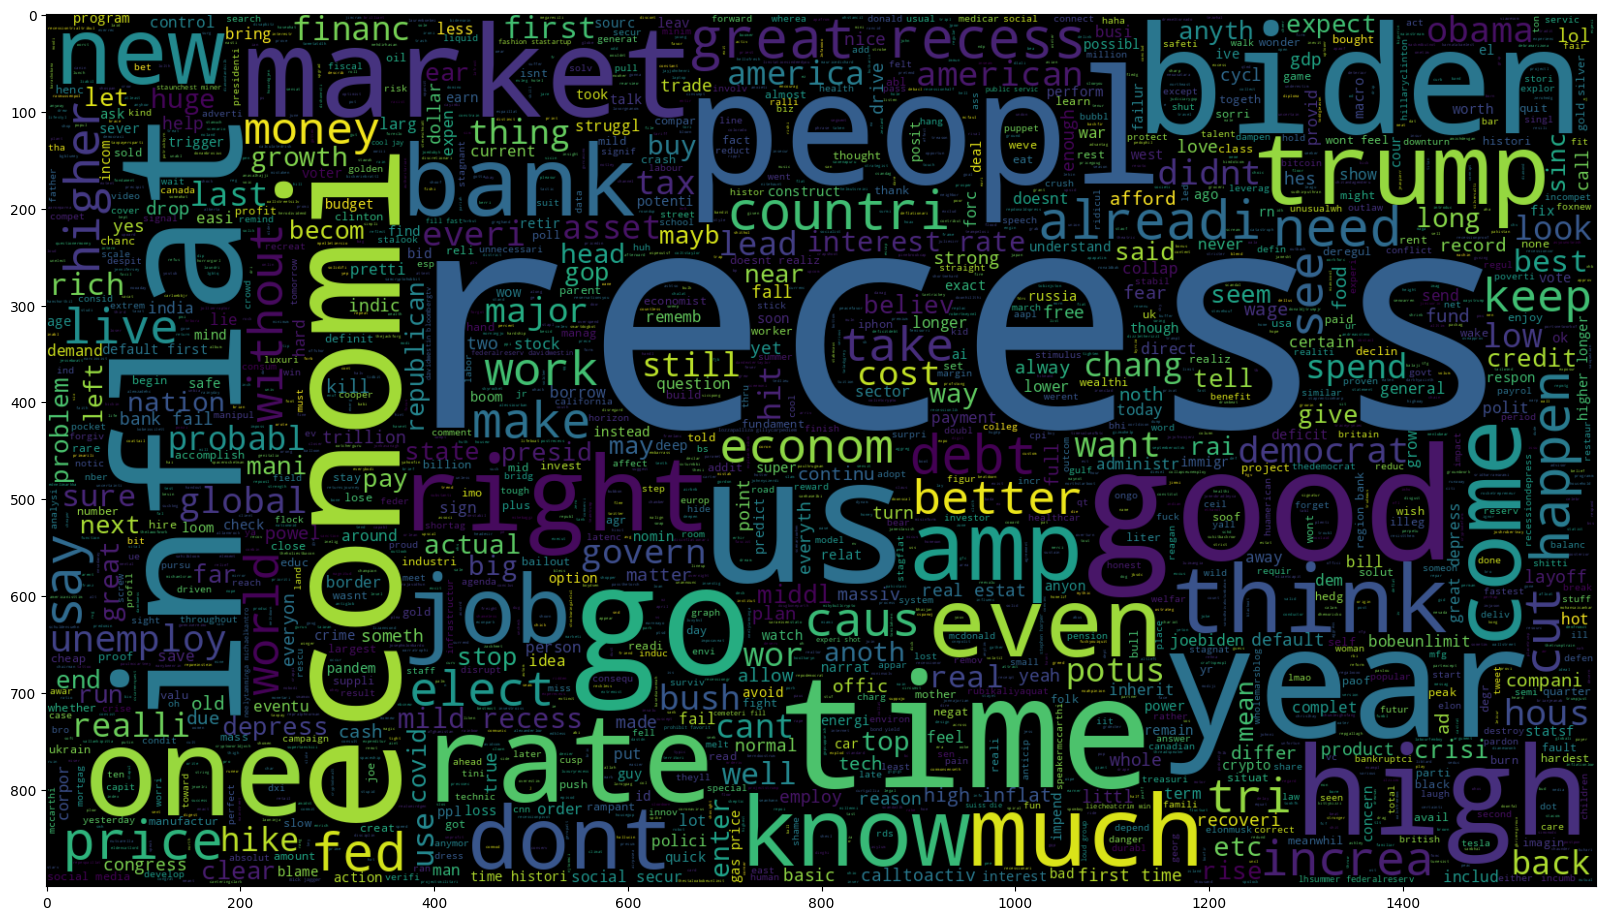

In [ ]:
plt.figure(figsize = (20,16))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 900).generate(" ".join(pandas_df[pandas_df["label"]==1.0].text_clean))
plt.imshow(wc , interpolation = 'bilinear')

#### Negative Sentiments Word Cloud

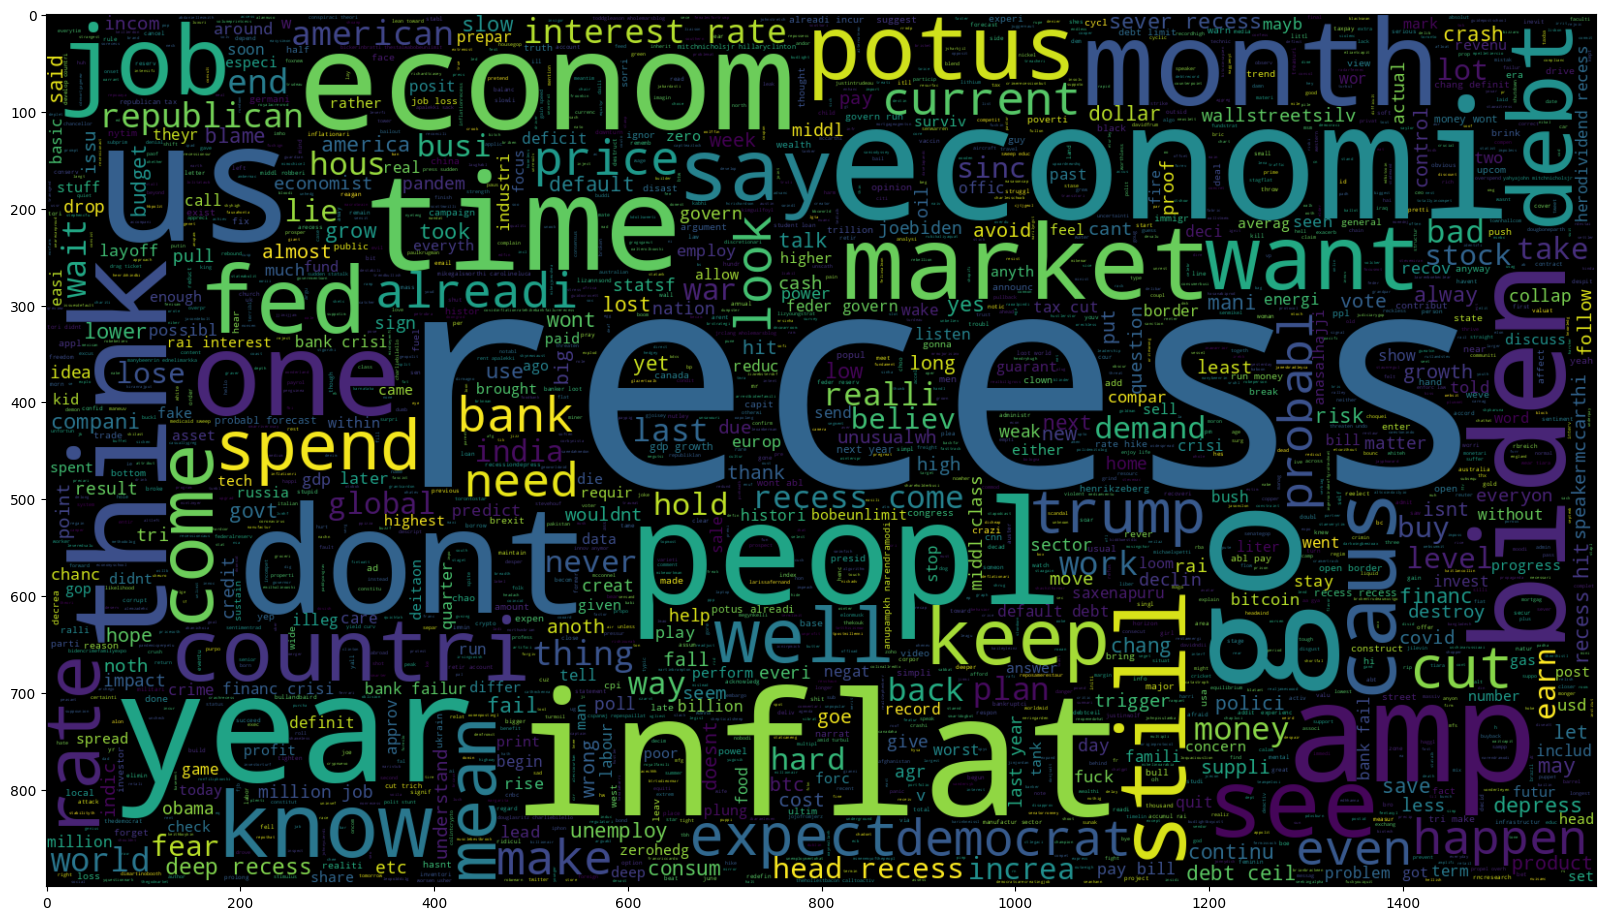

In [ ]:
plt.figure(figsize = (20,16))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 900).generate(" ".join(pandas_df[pandas_df["label"]==0.0].text_clean))
plt.imshow(wc , interpolation = 'bilinear')

### Preparing Data for Model Building

In [ ]:
drop_cols= ("Date","Tweet")
preprocdatas = df.drop(*drop_cols)

Tokenizing the Text

In [ ]:
from pyspark.ml.feature import Tokenizer

In [ ]:
tokenizer = Tokenizer(inputCol="text_clean", outputCol="words_tokens")
words_tokens = tokenizer.transform(preprocdatas)
words_tokens.show()

+--------------------+-----+--------------------+
|          text_clean|label|        words_tokens|
+--------------------+-----+--------------------+
| us full news deb...|    1|[, us, full, news...|
|saxenapuru know c...|    0|[saxenapuru, know...|
|swimfish statsf s...|    0|[swimfish, statsf...|
|taxpayersparti av...|    1|[taxpayersparti, ...|
|lose happi index ...|    0|[lose, happi, ind...|
|                    |    0|                  []|
|thekouk decid rec...|    0|[thekouk, decid, ...|
|republican posit ...|    0|[republican, posi...|
|    kill million job|    0|[, kill, million,...|
|treasuri dept war...|    0|[treasuri, dept, ...|
| job amp caus rec...|    1|[, job, amp, caus...|
|cwestonindo drive...|    0|[cwestonindo, dri...|
|acechhh traumat r...|    0|[acechhh, traumat...|
|uber investor go ...|    0|[uber, investor, ...|
|suppli demand alw...|    0|[suppli, demand, ...|
|                    |    0|                  []|
|reserv bank conti...|    1|[reserv, bank, co...|


Applying CountVectorizer

In [ ]:
from pyspark.ml.feature import CountVectorizer

In [ ]:
count = CountVectorizer (inputCol="words_tokens", outputCol="rawFeatures")
model = count.fit(words_tokens)
featurizedData = model.transform(words_tokens)
featurizedData.show()

+--------------------+-----+--------------------+--------------------+
|          text_clean|label|        words_tokens|         rawFeatures|
+--------------------+-----+--------------------+--------------------+
| us full news deb...|    1|[, us, full, news...|(3959,[0,1,3,11,1...|
|saxenapuru know c...|    0|[saxenapuru, know...|(3959,[0,21,25,83...|
|swimfish statsf s...|    0|[swimfish, statsf...|(3959,[0,7,28,45,...|
|taxpayersparti av...|    1|[taxpayersparti, ...|(3959,[0,179,215,...|
|lose happi index ...|    0|[lose, happi, ind...|(3959,[118,120,16...|
|                    |    0|                  []|        (3959,[],[])|
|thekouk decid rec...|    0|[thekouk, decid, ...|(3959,[0,2,8,19,9...|
|republican posit ...|    0|[republican, posi...|(3959,[14,69,279]...|
|    kill million job|    0|[, kill, million,...|(3959,[1,17,163,3...|
|treasuri dept war...|    0|[treasuri, dept, ...|(3959,[76,113,302...|
| job amp caus rec...|    1|[, job, amp, caus...|(3959,[0,1,6,15,1...|
|cwest

Applying Term Frequency - Inverse Document Frequency (TF-IDF)

In [ ]:
from pyspark.ml.feature import IDF

In [ ]:
idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

rescaledData.select("label", "features").show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    1|(3959,[0,1,3,11,1...|
|    0|(3959,[0,21,25,83...|
|    0|(3959,[0,7,28,45,...|
|    1|(3959,[0,179,215,...|
|    0|(3959,[118,120,16...|
|    0|        (3959,[],[])|
|    0|(3959,[0,2,8,19,9...|
|    0|(3959,[14,69,279]...|
|    0|(3959,[1,17,163,3...|
|    0|(3959,[76,113,302...|
|    1|(3959,[0,1,6,15,1...|
|    0|(3959,[0,3,276,39...|
|    0|(3959,[0,2801,327...|
|    0|(3959,[0,7,8,13,2...|
|    0|(3959,[34,114,124...|
|    0|(3959,[1],[1.2627...|
|    1|(3959,[0,2,8,11,2...|
|    0|(3959,[4,14,96,16...|
|    0|(3959,[1,8,43,86]...|
|    0|(3959,[0,1,73,120...|
+-----+--------------------+
only showing top 20 rows



In [ ]:
df_final = rescaledData.select("label", "features")# We want only the label and features columns for our machine learning models

In [ ]:
seed = 42  # set seed for reproducibility

trainDF, testDF = df_final.randomSplit([0.7,0.3],seed)

In [ ]:
trainDF.count()

863

In [ ]:
trainDF.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|        (3959,[],[])|
|    0|        (3959,[],[])|
|    0|        (3959,[],[])|
|    0|        (3959,[],[])|
|    0|        (3959,[],[])|
|    0|(3959,[0,1,2,8,57...|
|    0|(3959,[0,1,9,24,1...|
|    0|(3959,[0,1,28,120...|
|    0|(3959,[0,1,73,120...|
|    0|(3959,[0,3,34,60,...|
|    0|(3959,[0,3,276,39...|
|    0|(3959,[0,4,5,25,8...|
|    0|(3959,[0,4,13,15,...|
|    0|(3959,[0,4,30,31,...|
|    0|(3959,[0,7,28,45,...|
|    0|(3959,[0,8,29,36,...|
|    0|(3959,[0,9,23,28,...|
|    0|(3959,[0,10,26,37...|
|    0|(3959,[0,13,17,48...|
|    0|(3959,[0,28,108,2...|
+-----+--------------------+
only showing top 20 rows



In [ ]:
trainDF.groupby("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|  256|
|    0|  607|
+-----+-----+



Training the Model

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
lr = LogisticRegression(labelCol = "label", featuresCol = "features",maxIter = 10)
model = lr.fit(trainDF)

In [ ]:
predictions = model.transform(testDF)

In [ ]:
pred = predictions.toPandas()
pred.head()

,label,features,rawPrediction,probability,prediction
0,0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5.01057165547936, -5.01057165547936]","[0.9933770647738144, 0.006622935226185622]",0.0
1,0,"(0.34251263012622796, 1.2627172613215194, 2.51...","[3.2088096760799196, -3.2088096760799196]","[0.9611644582931627, 0.03883554170683734]",0.0
2,0,"(0.34251263012622796, 1.2627172613215194, 0.0,...","[-3.4593511486419306, 3.4593511486419306]","[0.030491208438367157, 0.9695087915616328]",1.0
3,0,"(0.6850252602524559, 1.2627172613215194, 0.0, ...","[-3.4209046474745666, 3.4209046474745666]","[0.03164849202024538, 0.9683515079797547]",1.0
4,0,"(0.34251263012622796, 0.0, 2.5154802298168875,...","[6.445572389237142, -6.445572389237142]","[0.9984149806540096, 0.0015850193459904238]",0.0


Evaluating the Model

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol = "label", metricName='areaUnderROC')

In [ ]:
areaUnderROC = evaluator.evaluate(predictions)
print(f"The testing areaUnderROC of our Logistic Regression model is: {areaUnderROC}")

The testing areaUnderROC of our Logistic Regression model is: 0.8129787496911294


Classification Report and Confusion Matrix

In [ ]:
y_true = pred['label'].astype('float')
y_pred = pred['prediction']

In [ ]:
y_true.value_counts()

0.0    284
1.0    114
Name: label, dtype: int64

In [ ]:
y_pred.value_counts()

0.0    312
1.0     86
Name: prediction, dtype: int64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       284
         1.0       0.69      0.52      0.59       114

    accuracy                           0.79       398
   macro avg       0.75      0.71      0.73       398
weighted avg       0.78      0.79      0.78       398



<Axes: >

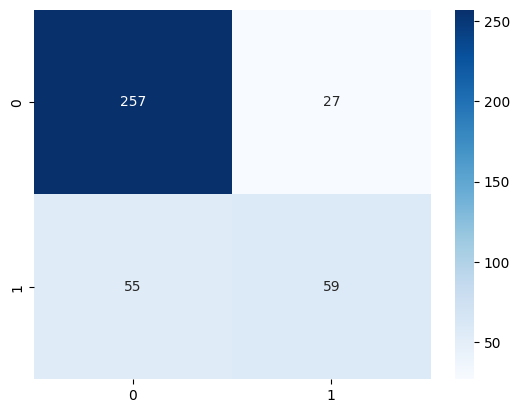

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true, y_pred), annot = True, fmt=  'd', cmap = 'Blues')